<a href="https://colab.research.google.com/github/HakunanMatatat/nezha/blob/main/%E4%B8%AD%E6%96%87_%E8%B4%9F%E5%8F%B7%E6%98%BE%E7%A4%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-04-01 03:18:05--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  7.33MB/s    in 1.3s    

2025-04-01 03:18:07 (7.33 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



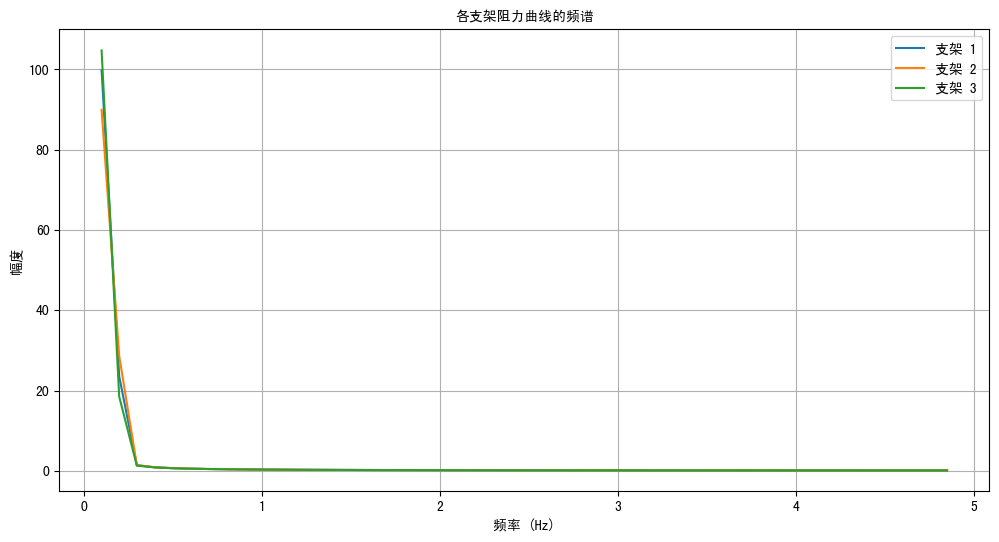

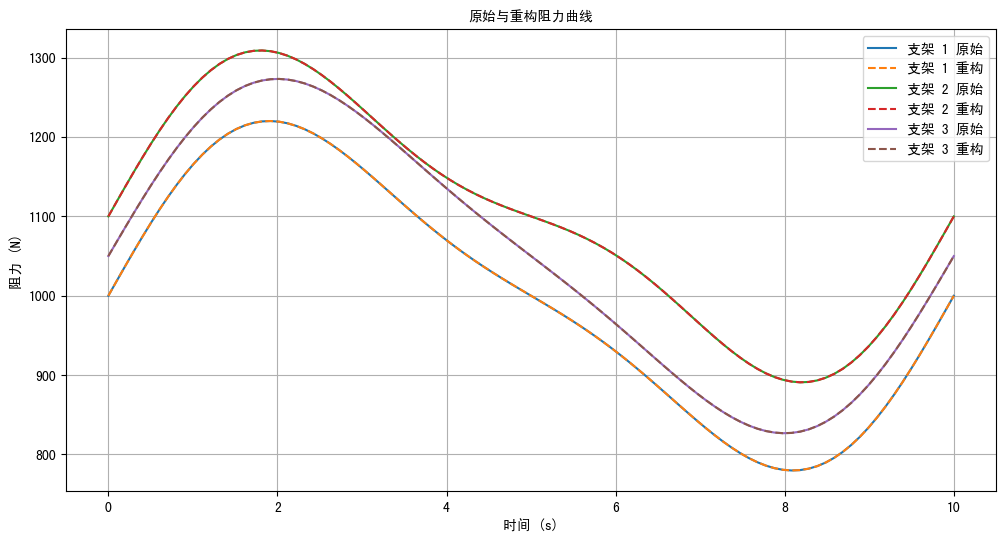

In [27]:
# 下载一个支持中文的字体到系统字体目录
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 引入下载的中文字体
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
matplotlib.rc('font', family='SimHei')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import os

# 模拟 3 个支架的阻力数据（周期性信号）
t = np.linspace(0, 10, 100)  # 设定时间
P1 = 1000 + 200 * np.sin(2 * np.pi * t / 10) + 50 * np.sin(2 * np.pi * 2 * t / 10)  # 支架 1
P2 = 1100 + 180 * np.sin(2 * np.pi * t / 10) + 60 * np.sin(2 * np.pi * 2 * t / 10)  # 支架 2
P3 = 1050 + 210 * np.sin(2 * np.pi * t / 10) + 40 * np.sin(2 * np.pi * 2 * t / 10)  # 支架 3
data = [P1, P2, P3]

# 计算傅立叶变换
plt.figure(figsize=(12, 6))
for i, P in enumerate(data, 1):
    fft_result = np.fft.fft(P)
    freq = np.fft.fftfreq(len(t), d=t[1] - t[0])
    amplitude = np.abs(fft_result) / len(t)  # 归一化幅度

    # 只取正频率部分
    pos_mask = freq > 0
    plt.plot(freq[pos_mask], amplitude[pos_mask], label=f'支架 {i}')

plt.xlabel(u'频率 (Hz)', fontproperties=zhfont)
plt.ylabel(u'幅度', fontproperties=zhfont)
plt.title(u'各支架阻力曲线的频谱', fontproperties=zhfont)
plt.legend()
plt.grid()
plt.show()


# 进行傅立叶逆变换并绘制原始 vs. 重构曲线
plt.figure(figsize=(12, 6))
for i, P in enumerate(data, 1):
    fft_result = np.fft.fft(P)
    P_reconstructed = np.fft.ifft(fft_result).real
    plt.plot(t, P, label=f'支架 {i} 原始')
    plt.plot(t, P_reconstructed, '--', label=f'支架 {i} 重构')

plt.xlabel(u'时间 (s)', fontproperties=zhfont)
plt.ylabel(u'阻力 (N)', fontproperties=zhfont)
plt.title(u'原始与重构阻力曲线', fontproperties=zhfont)
plt.legend()
plt.grid()
plt.show()


--2025-04-01 03:11:52--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M   145KB/s    in 26s     

2025-04-01 03:12:18 (384 KB/s) - ‘simhei.ttf’ saved [10050870/10050870]



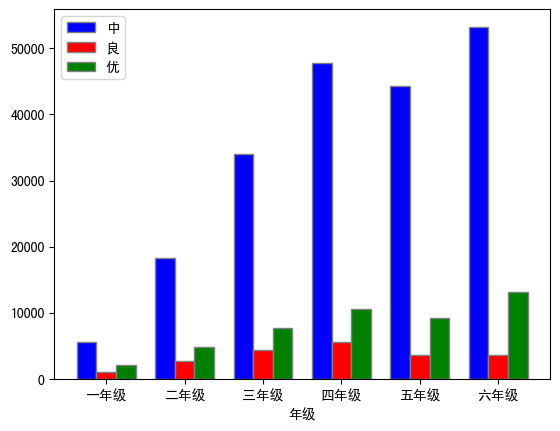

In [25]:
!pip install matplotlib

!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# # 新增字體
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

# 定义数据
grades = ['一年级', '二年级', '三年级', '四年级', '五年级', '六年级']
rating = ['中', '良', '优']
numbers = [
    [5647, 1024, 2160],
    [18301, 2756, 4810],
    [34048, 4326, 7744],
    [47731, 5576, 10514],
    [44271, 3562, 9149],
    [53252, 3564, 13213]
]

barWidth = 0.25

# 设置位置
r1 = np.arange(len(numbers))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# 绘制柱形图
plt.bar(r1, [num[0] for num in numbers], color='b', width=barWidth, edgecolor='grey', label='中')
plt.bar(r2, [num[1] for num in numbers], color='r', width=barWidth, edgecolor='grey', label='良')
plt.bar(r3, [num[2] for num in numbers], color='g', width=barWidth, edgecolor='grey', label='优')

# 描述柱形图
plt.xlabel('年级', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(numbers))], grades)

# 创建图例
plt.legend()

# 显示图表
plt.show()



--2025-04-01 02:58:46--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M   148KB/s    in 71s     

2025-04-01 02:59:57 (139 KB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

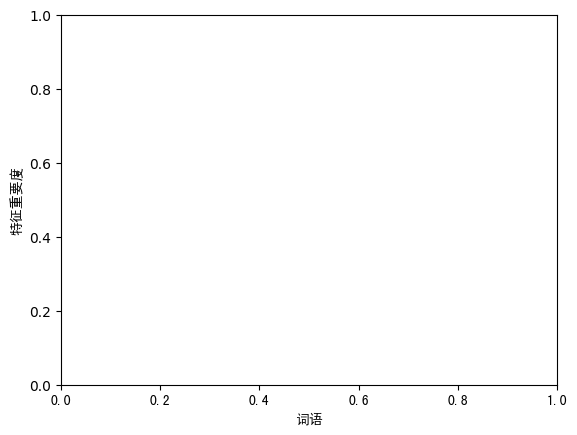

In [17]:
# 下载一个支持中文的字体到系统字体目录
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# 引入下载的中文字体
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 画坐标及坐标轴文本的时候引用
plt.xlabel(u'词语', fontproperties=zhfont)
plt.ylabel(u'特征重要度', fontproperties=zhfont)
plt.xticks(fontproperties=zhfont)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 17 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/opentype/n

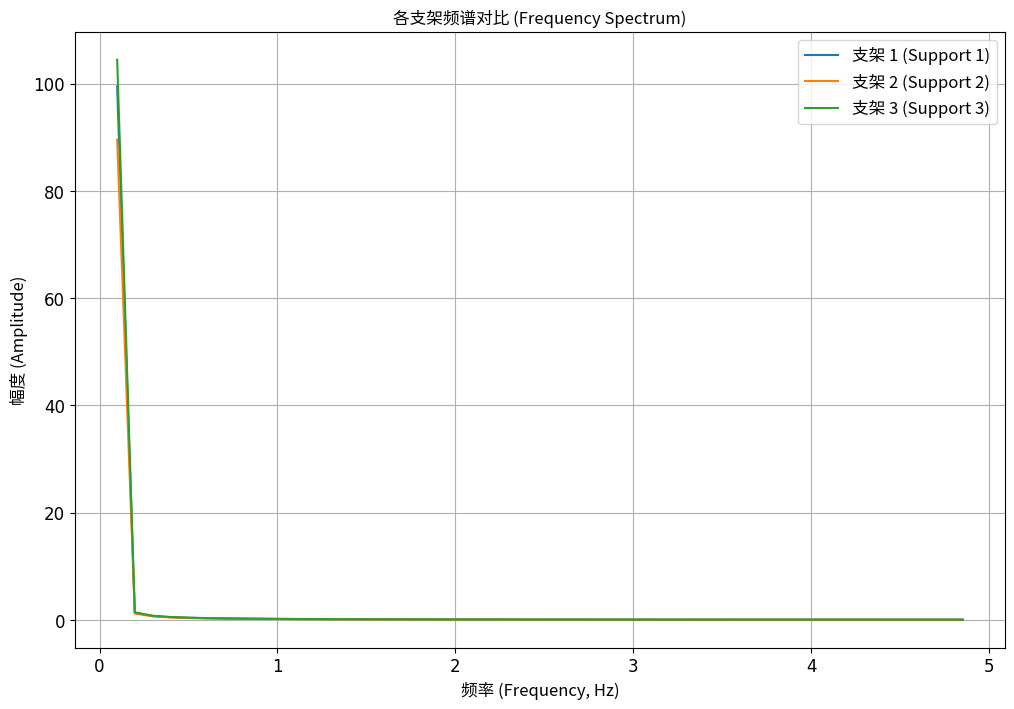

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os

# 安装必要字体并更新缓存
!apt-get install -y fonts-noto-cjk
!mkdir -p ~/.cache/matplotlib  # 确保缓存目录存在
!fc-cache -fv  # 强制刷新系统字体缓存

# 设置全局字体配置
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Noto Sans CJK SC'],  # 简体中文优先
    'axes.unicode_minus': False
})

# 获取实际字体路径（验证字体安装位置）
noto_fonts = [f for f in font_manager.findSystemFonts() if 'NotoSansCJK' in f]
if not noto_fonts:
    raise RuntimeError("Noto 字体未正确安装")

# 创建字体属性对象
cn_font = font_manager.FontProperties(
    fname=noto_fonts[0],  # 使用第一个找到的Noto字体
    size=12
)

# 模拟数据生成
t = np.linspace(0, 10, 100)
P1 = 1000 + 200 * np.sin(2 * np.pi * t / 10)
P2 = 1100 + 180 * np.sin(2 * np.pi * t / 10)
P3 = 1050 + 210 * np.sin(2 * np.pi * t / 10)
data = [P1, P2, P3]

# 绘制频谱图
plt.figure(figsize=(12, 8))
for i, P in enumerate(data, 1):
    fft_result = np.fft.fft(P)
    freq = np.fft.fftfreq(len(t), d=t[1] - t[0])
    amplitude = np.abs(fft_result) / len(t)
    pos_mask = freq > 0
    plt.plot(freq[pos_mask], amplitude[pos_mask], label=f'支架 {i} (Support {i})')

# 设置中文标签（使用验证过的字体）
plt.title('各支架频谱对比 (Frequency Spectrum)', fontproperties=cn_font)
plt.xlabel('频率 (Frequency, Hz)', fontproperties=cn_font)
plt.ylabel('幅度 (Amplitude)', fontproperties=cn_font)
plt.legend(prop=cn_font)
plt.grid()
plt.show()

请上传字体文件（可能需要多次执行）：


Saving SimSun.ttf to SimSun.ttf
Saving times-new-roman.ttf to times-new-roman.ttf
已注册字体: SimSun -> SimSun.ttf
已注册字体: TimesNewRoman -> times-new-roman.ttf


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26550 (\N{CJK UNIFIED IDEOGRAPH-67B6}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


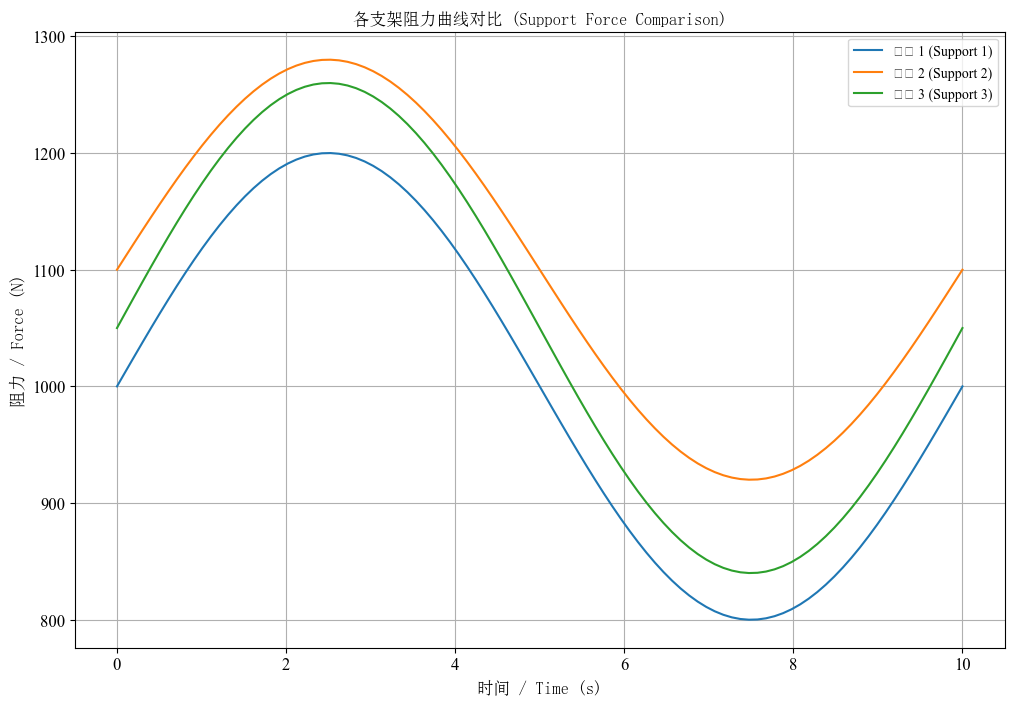

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from google.colab import files

# ==== 步骤 1：上传字体文件 ====
# 请手动上传以下两个字体文件（需要本地有合法授权文件）：
# 1. simsun.ttc (宋体)
# 2. TIMESBD.TTF (Times New Roman Bold)
# 3. TIMES.TTF (Times New Roman Regular)
print("请上传字体文件（可能需要多次执行）：")
uploaded = files.upload()

# ==== 步骤 2：注册字体 ====
# 获取字体文件路径
font_paths = {
    'SimSun': next(f for f in uploaded.keys() if 'simsun' in f.lower()),
    'TimesNewRoman': next(f for f in uploaded.keys() if 'times' in f.lower()),
}

# 注册到 matplotlib
for name, path in font_paths.items():
    font_manager.fontManager.addfont(path)
    print(f"已注册字体: {name} -> {path}")

# ==== 步骤 3：配置全局字体 ====
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # 默认英文字体
    'font.sans-serif': ['SimSun'],      # 备用中文字体
    'axes.unicode_minus': False
})

# ==== 步骤 4：创建字体属性对象 ====
times_new_roman = font_manager.FontProperties(
    fname=font_paths['TimesNewRoman'],
    size=12
)

simsun = font_manager.FontProperties(
    fname=font_paths['SimSun'],
    size=12
)

# ==== 步骤 5：生成测试图表 ====
t = np.linspace(0, 10, 100)
P1 = 1000 + 200 * np.sin(2 * np.pi * t / 10)
P2 = 1100 + 180 * np.sin(2 * np.pi * t / 10)
P3 = 1050 + 210 * np.sin(2 * np.pi * t / 10)

plt.figure(figsize=(12, 8))
for i, P in enumerate([P1, P2, P3], 1):
    plt.plot(t, P, label=f'支架 {i} (Support {i})')

# ==== 步骤 6：设置混合字体样式 ====
# 标题：中文用宋体，英文用 Times New Roman
plt.title(
    '各支架阻力曲线对比 (Support Force Comparison)',
    fontproperties=simsun,  # 中文部分
    fontdict={'fontname': 'Times New Roman'}  # 英文部分
)

# X轴标签
plt.xlabel(
    '时间 / Time (s)',
    fontproperties=simsun,  # 中文
    fontdict={'fontname': 'Times New Roman'}  # 英文
)

# Y轴标签
plt.ylabel(
    '阻力 / Force (N)',
    fontproperties=simsun,
    fontdict={'fontname': 'Times New Roman'}
)

# 图例设置（自动识别语言）
plt.legend(
    prop={'family': 'Times New Roman', 'size': 10},
    title_fontproperties=simsun
)

plt.grid()
plt.show()

请上传字体文件（simsun.ttc, TIMES.TTF 或 TIMESBD.TTF）：


Saving SimSun.ttf to SimSun (3).ttf
Saving times-new-roman.ttf to times-new-roman (3).ttf
已注册字体: SimSun -> SimSun (3).ttf
已注册字体: TimesNewRoman -> times-new-roman (3).ttf


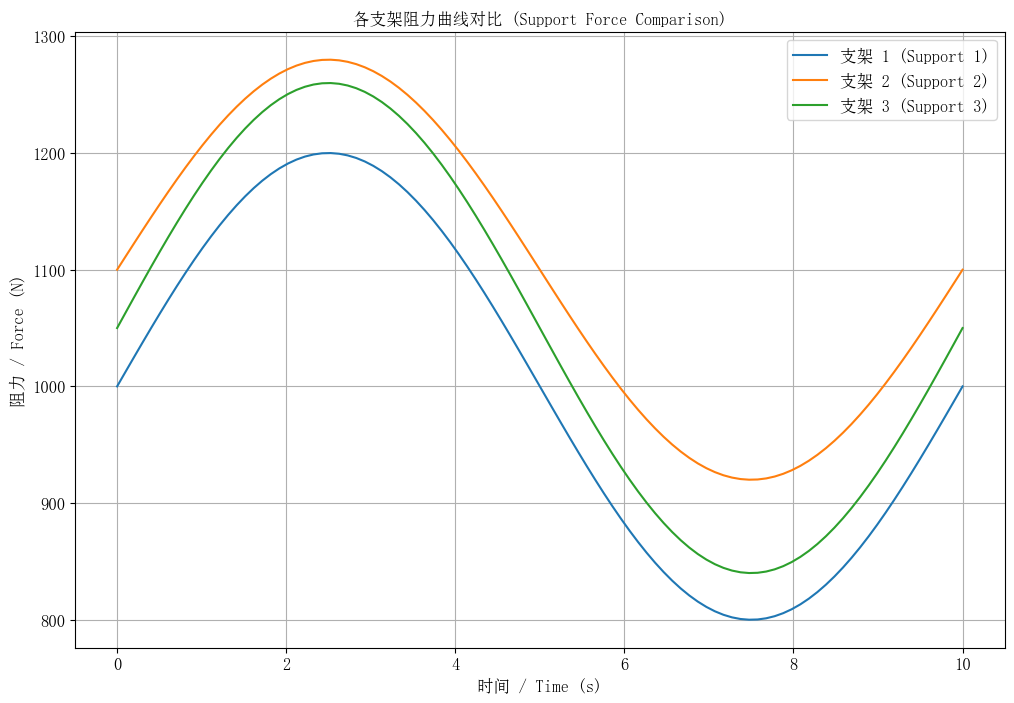

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from google.colab import files

# ==== 步骤 1：上传字体文件 ====
print("请上传字体文件（simsun.ttc, TIMES.TTF 或 TIMESBD.TTF）：")
uploaded = files.upload()

# ==== 步骤 2：注册字体 ====
font_paths = {
    'SimSun': next(f for f in uploaded.keys() if 'simsun' in f.lower()),
    'TimesNewRoman': next(f for f in uploaded.keys() if 'times' in f.lower()),
}

for name, path in font_paths.items():
    font_manager.fontManager.addfont(path)
    print(f"已注册字体: {name} -> {path}")

# ==== 步骤 3：配置全局字体 ====
plt.rcParams.update({
    'font.family': 'sans-serif',           # 使用 sans-serif 作为默认，支持 SimSun
    'font.sans-serif': ['SimSun'],         # 中文默认用宋体
    'font.serif': ['Times New Roman'],     # 英文备用字体
    'axes.unicode_minus': False            # 解决负号显示问题
})

# ==== 步骤 4：创建字体属性对象 ====
times_new_roman = font_manager.FontProperties(
    fname=font_paths['TimesNewRoman'],
    size=12
)

simsun = font_manager.FontProperties(
    fname=font_paths['SimSun'],
    size=12
)

# ==== 步骤 5：生成测试图表 ====
t = np.linspace(0, 10, 100)
P1 = 1000 + 200 * np.sin(2 * np.pi * t / 10)
P2 = 1100 + 180 * np.sin(2 * np.pi * t / 10)
P3 = 1050 + 210 * np.sin(2 * np.pi * t / 10)

plt.figure(figsize=(12, 8))
for i, P in enumerate([P1, P2, P3], 1):
    plt.plot(t, P, label=f'支架 {i} (Support {i})')

# ==== 步骤 6：设置混合字体样式 ====
# 标题
plt.title('各支架阻力曲线对比 (Support Force Comparison)', fontproperties=simsun)

# X轴标签
plt.xlabel('时间 / Time (s)', fontproperties=simsun)

# Y轴标签
plt.ylabel('阻力 / Force (N)', fontproperties=simsun)

# 图例设置：支持中英文混合
plt.legend(prop=simsun, loc='best')  # 使用宋体渲染图例，确保中文正常显示

plt.grid()
plt.show()